In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"F:\Nividha\Lambton\1413_Intro_to_AI\Assignment_1\K_means_clustering\buddymove_holidayiq.csv")
data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [3]:
data.dropna(how="all")
data.isnull().sum()

User Id      0
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64

In [4]:
data.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


In [5]:
X = data.iloc[:, 1:].values

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


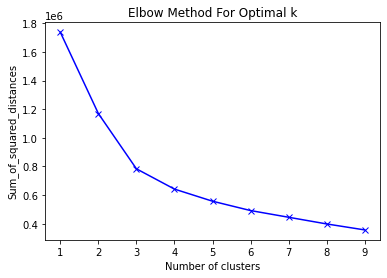

In [15]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 10): 

    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 10), wcss, 'bx-') 
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances') 
plt.title('Elbow Method For Optimal k')
plt.show()




In [20]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [11]:
print(y_kmeans)

[0 0 0 0 5 0 0 0 0 0 5 5 0 5 0 0 0 0 0 5 0 5 0 0 0 0 0 5 0 0 0 0 5 0 5 0 0
 0 0 5 0 0 5 0 0 0 5 5 0 0 1 5 0 0 0 5 0 0 5 0 5 5 0 0 5 0 0 0 5 0 5 0 0 0
 0 5 0 5 0 5 0 5 5 0 0 0 0 5 0 0 5 5 0 0 0 0 5 5 0 0 5 0 5 0 0 0 5 0 2 3 2
 2 4 3 4 3 1 4 3 2 2 4 4 2 2 3 2 4 2 1 3 2 4 0 4 2 1 3 3 5 3 2 3 1 2 1 4 2
 1 4 4 4 4 2 2 2 3 4 1 3 1 3 1 4 4 1 2 4 1 3 4 2 3 4 3 1 4 3 4 1 4 2 2 1 4
 1 4 4 4 3 1 3 4 4 1 4 3 3 4 1 3 2 1 4 1 2 2 4 2 1 2 4 1 1 1 4 3 1 4 4 2 2
 3 2 1 4 2 1 3 3 3 1 3 4 2 4 1 0 2 2 1 4 4 4 3 4 3 3 3]


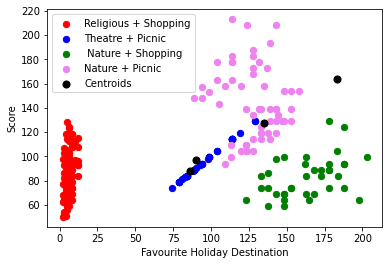

In [92]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 40, c = 'red', label = 'Religious + Shopping')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 1], s = 40, c = 'blue', label = 'Theatre + Picnic')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40, c = 'green', label = ' Nature + Shopping ')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 3], s = 40, c = 'violet', label = 'Nature + Picnic')
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.xlabel('Favourite Holiday Destination') 
plt.ylabel('Score') 
plt.legend() 

plt.show()

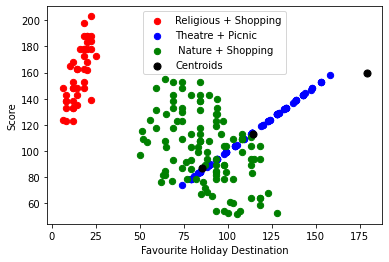

In [97]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 40, c = 'red', label = 'Religious + Shopping')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 1], s = 40, c = 'blue', label = 'Theatre + Picnic')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 40, c = 'green', label = ' Nature + Shopping ')
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.xlabel('Favourite Holiday Destination') 
plt.ylabel('Score') 
plt.legend() 

plt.show()

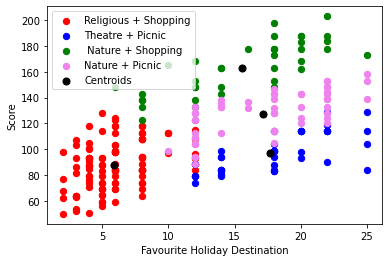

In [90]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 40, c = 'red', label = 'Religious + Shopping')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 40, c = 'blue', label = 'Theatre + Picnic')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 40, c = 'green', label = ' Nature + Shopping ')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 40, c = 'violet', label = 'Nature + Picnic')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label = 'Centroids')
plt.xlabel('Favourite Holiday Destination') 
plt.ylabel('Score') 
plt.legend() 

plt.show()